# Binomial Option Pricing Model for a European & American Option.

Following parameters are inputs to your model:
· Option type: CALL option
· Spot Price: 100
· Strike Price: 104
· Time to maturity: 2 years
· Risk free rate: 6%
· Size of up move (u) = 1.2
· Size of down move (d) = 0.8
· Number of steps: 2 and 100

You are expected to calculate the present value (i.e. MTM of the option). Use the same set of inputs above and calculate the MTM valuation by treating this option as both
a.      European CALL option
b.      American CALL option

# SOURCE CODE FILE:

In [1]:
# Libraries used:

import numpy as np 
import matplotlib.pyplot as plt

In [2]:
# Initialise parameters

S0 = 100      # initial stock price
K = 104       # strike price
T = 2         # time to maturity in years
r = 0.06      # annual risk-free rate
N = 2 or 100  # number of time steps
u = 1.2       # up-factor in binomial models
d = 0.8       # ensure recombining tree
opttype = 'C' # Option Type 'C' for call option

### Binomial option model (for European option)

In [3]:
def binomial_european_tree(K,T,S0,r,N,u,d,opttype='C'):
    #precompute constants
    dt = T/N
    q = (np.exp(r*dt) - d) / (u-d)
    disc = np.exp(-r*dt)
    
    # initialise asset prices at maturity - Time step N
    S = np.zeros(N+1)
    S[0] = S0*d**N
    for j in range(1,N+1):
        S[j] = S[j-1]*u/d
    
    # initialise option values at maturity
    C = np.zeros(N+1)
    for j in range(0,N+1):
        C[j] = max(0, S[j]-K)
        
    # step backwards through tree
    for i in np.arange(N,0,-1):
        for j in range(0,i):
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )
    
    return C[0]

In [4]:
# Binomial option pricing for no. of steps (N) = 2

e_2 = binomial_european_tree(K=104,T=2,S0=100,r=0.06,N=2,u=1.2,d=0.8,opttype='C')
print("Value of european call option for N(2) will be:", e_2)

Value of european call option for N(2) will be: 15.201456441045721


In [5]:
# Binomial option pricing for no. of steps (N) = 100

e_100 = binomial_european_tree(K=104,T=2,S0=100,r=0.06,N=100,u=1.2,d=0.8,opttype='C')
print("Value of european call option for N(100) will be:", e_100)

Value of european call option for N(100) will be: 69.85883133968106


### Binomial option model (for American option)

In [6]:
def binomial_american_tree(K,T,S0,r,N,u,d,opttype='P'):
    #precompute values
    dt = T/N
    q = (np.exp(r*dt) - d)/(u-d)
    disc = np.exp(-r*dt)
    
    # initialise stock prices at maturity
    S = np.zeros(N+1)
    for j in range(0, N+1):
        S[j] = S0 * u**j * d**(N-j)
        
    # option payoff 
    C = np.zeros(N+1)
    for j in range(0, N+1):
        if opttype == 'P':
            C[j] = max(0, K - S[j])
        else:
            C[j] = max(0, S[j] - K)
    
    # backward recursion through the tree
    for i in np.arange(N-1,-1,-1):
        for j in range(0,i+1):
            S = S0 * u**j * d**(i-j)
            C[j] = disc * ( q*C[j+1] + (1-q)*C[j] )
            if opttype == 'P':
                C[j] = max(C[j], K - S)
            else:
                C[j] = max(C[j], S - K)
                
    return C[0]

In [7]:
# Binomial option pricing for no. of steps (N) = 2

a_2 = binomial_american_tree(K=104,T=2,S0=100,r=0.06,N=2,u=1.2,d=0.8,opttype='C')
print("Value of american call option for N(2) will be:", a_2 )

Value of american call option for N(2) will be: 15.201456441045721


In [8]:
# Binomial option pricing for no. of steps (N) = 100

a_100 = binomial_american_tree(K=104,T=2,S0=100,r=0.06,N=100,u=1.2,d=0.8,opttype='C')
print("Value of american call option for N(100) will be:", a_100 )

Value of american call option for N(100) will be: 69.85883133968106


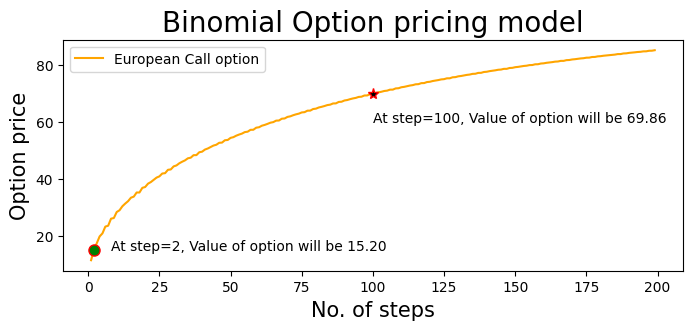

In [9]:
## plotting european call option with different steps 

runs1 = list(range(1,200,1))
ec1 = []
ac1 = []
S0 = 100      # initial stock price
K = 104       # strike price
T = 2         # time to maturity in years
r = 0.06      # annual risk-free rate
N = 2         # number of time steps
u = 1.2       # up-factor in binomial models
d = 0.8       # ensure recombining tree
opttype = 'C' # Option Type 'C' for call option

for N in runs1:
    ec1.append(binomial_european_tree(K,T,S0,r,N,u,d,opttype='C'))

plt.figure(figsize = (8,3))
plt.plot(runs1, ec1, label='European Call option',color="orange")
plt.legend(loc='upper left')

plt.annotate(
'At step=2, Value of option will be 15.20', xy=(2, 15.20), xytext=(8, 15))
x1=2
y1=15.20
plt.plot(x1, y1, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="green")

plt.annotate(
'At step=100, Value of option will be 69.86', xy=(100, 69.86), xytext=(100, 60))
plt.title("Binomial Option pricing model",fontsize=20)
x2=100
y2=69.86
plt.plot(x2, y2, marker="*", markersize=8, markeredgecolor="red", markerfacecolor="black")
plt.xlabel("No. of steps", fontsize=15)
plt.ylabel("Option price",fontsize=15)
plt.show()

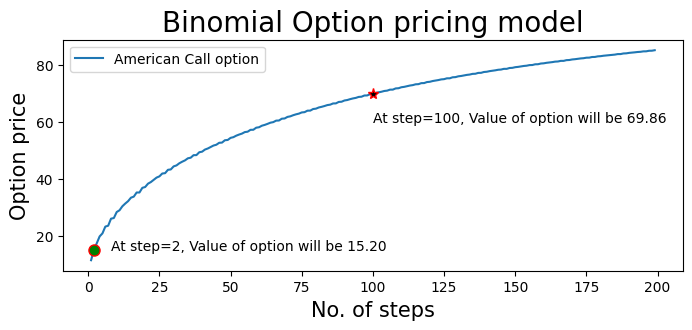

In [10]:
## plotting american call option with different steps 

runs1 = list(range(1,200,1))
ec1 = []
ac1 = []
S0 = 100      # initial stock price
K = 104       # strike price
T = 2         # time to maturity in years
r = 0.06      # annual risk-free rate
N = 2         # number of time steps
u = 1.2       # up-factor in binomial models
d = 0.8       # ensure recombining tree
opttype = 'C' # Option Type 'C' for call option

for N in runs1:
    ac1.append(binomial_american_tree(K,T,S0,r,N,u,d,opttype='C'))

plt.figure(figsize = (8,3))
plt.plot(runs1, ac1, label='American Call option')
plt.legend(loc='upper left')
plt.annotate(
'At step=2, Value of option will be 15.20', xy=(2, 15.20), xytext=(8, 15))
x3=2
y3=15.20
plt.plot(x3, y3, marker="o", markersize=8, markeredgecolor="red", markerfacecolor="green")

plt.annotate(
'At step=100, Value of option will be 69.86', xy=(100, 69.86), xytext=(100, 60))
plt.title("Binomial Option pricing model",fontsize=20)
x4=100
y4=69.86
plt.plot(x4, y4, marker="*", markersize=8, markeredgecolor="red", markerfacecolor="black")
plt.xlabel("No. of steps", fontsize=15)
plt.ylabel("Option price",fontsize=15)
plt.show()